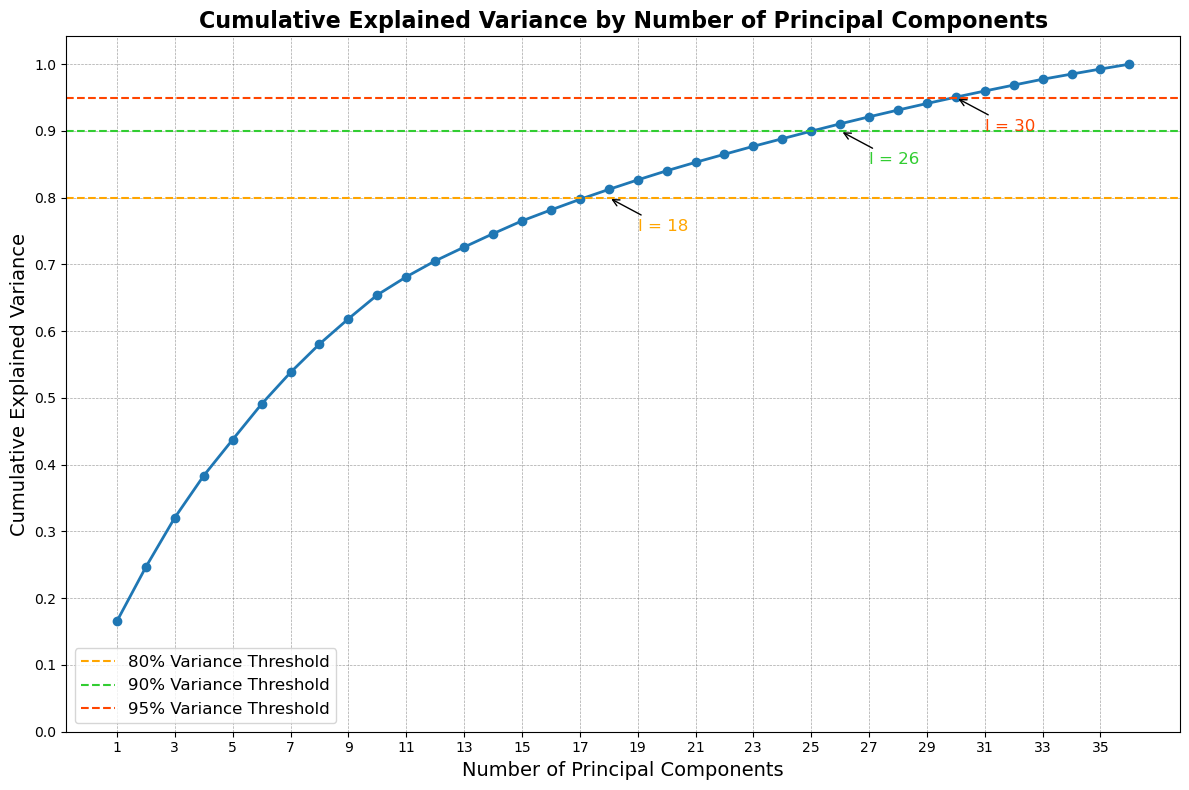

Suitable value of reduced dimension l for 80% cumulative variance: 18
Suitable value of reduced dimension l for 90% cumulative variance: 26
Suitable value of reduced dimension l for 95% cumulative variance: 30


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Dataset 3 training data and labels
train_data = pd.read_csv('Dataset-3/train_data.csv')
train_labels = pd.read_csv('Dataset-3/train_label.csv')

# Separate features
X_train = train_data.values
y_train = train_labels.values.flatten()  # Convert to 1D array

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA()
pca.fit(X_train_standardized)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance against the number of components
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='#1f77b4', markersize=6, linewidth=2)

# Enhance the plot's aesthetics
plt.title('Cumulative Explained Variance by Number of Principal Components', fontsize=16, fontweight='bold')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add thresholds for cumulative variance at 80%, 90%, and 95%
plt.axhline(y=0.80, color='#FFA500', linestyle='--', linewidth=1.5, label='80% Variance Threshold')
plt.axhline(y=0.90, color='#32CD32', linestyle='--', linewidth=1.5, label='90% Variance Threshold')
plt.axhline(y=0.95, color='#FF4500', linestyle='--', linewidth=1.5, label='95% Variance Threshold')

# Determine suitable values of l for 80%, 90%, and 95% cumulative variance
l_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 for zero-indexing
l_90 = np.argmax(cumulative_variance >= 0.90) + 1
l_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Add annotations for l values at 80%, 90%, and 95%
plt.annotate(f'l = {l_80}', xy=(l_80, 0.80), xytext=(l_80+1, 0.75),
             arrowprops=dict(facecolor='#FFA500', arrowstyle='->'), fontsize=12, color='#FFA500')
plt.annotate(f'l = {l_90}', xy=(l_90, 0.90), xytext=(l_90+1, 0.85),
             arrowprops=dict(facecolor='#32CD32', arrowstyle='->'), fontsize=12, color='#32CD32')
plt.annotate(f'l = {l_95}', xy=(l_95, 0.95), xytext=(l_95+1, 0.90),
             arrowprops=dict(facecolor='#FF4500', arrowstyle='->'), fontsize=12, color='#FF4500')

# Add xticks for better visualization
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 2))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add legend and show plot
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print suitable values of l for 80%, 90%, and 95% cumulative variance
print(f"Suitable value of reduced dimension l for 80% cumulative variance: {l_80}")
print(f"Suitable value of reduced dimension l for 90% cumulative variance: {l_90}")
print(f"Suitable value of reduced dimension l for 95% cumulative variance: {l_95}")
